In [241]:
#import thinkplot
#import thinkstats2
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import thinkplot
import thinkstats2
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##Seaborn for fancy plots. 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (15,5)

# Assignment 3 - Basic Predictions and Regression

## Questions

### Part 1 - Election Prediction

Suppose you are looking at an election in a fictional province. There are 7 total elctoral districts, and the winner in each district is determined by a first-past-the-post system (what we have in Canada - the most votes wins, regardless of share). There are two parties - the Purples and the Yellows. Whoever controls the most seats will be the ruling party - so in our 2 party scenario, the party who wins 4 or more of the districts will govern. There is an election every year, they love voting. 

Recent polling indicating the expected vote share in each district is shown in the "dist_polls" table below. These values are a composite of several polls that the experts have combined and weighted. The "Purple" values show the expected vote share of the Purple party, along with the variance of that expectation and the number of polls that were combined to get that result.  

As well, research has shown that the vote distribution is impacted by voter turnout. In general, the more people vote, the more the vote split shifts towards the Yellow party. We have data on past elections and the results, we expect that the turnout will be in line with the past elections - or more specifically, we have no reason to expect it to differ. This impact is measured in the table in code below - that table shows the voter turnout, in a percentage, as well as the change in the Yellow party's vote share (also in percentage) as compared to the polling averages. For example, if one row showed "52" and ".8", that would mean that voter turnout was 52%, and the Yellow party got .8% higher of a vote share than the polling showed. 

<b>What is the probability that the Purple Party controls the government after the election?</b>

<b>Note:</b> the errors and confidence intervals are not totally trivial. As part of the written answer, offer an evaluation of your confidence in the prediction, and why you think that. This is not a question with one specific error, your estimation will have some expected errors, somewhere. You may not have the tools to calculate it all the way through, that's fine. 

### Question 1 - Your Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>
<li>
<li>
<li>
<li> <b> What do you think about the error/accuracy:</b>
</ul>

##### Setup Poll Data

The dataframe "dist_polls" contains all of the polls for each seat. Each value is expressed as expected vote share (as a ratio) for the <b>Purple</b> party. The Yellow party can be safely assumed to get the rest of the votes. 

In [242]:
#https://stackoverflow.com/questions/40729162/merging-results-from-model-predict-with-original-pandas-dataframe

In [243]:
# Please don't edit this part. 
# Setup polling data. 
districts = [1,2,3,4,5,6,7]
dist_polls = pd.DataFrame(districts, columns={"district"})

dist_polls["Poll_1"] = [.55, .49, .51, .6, .41, .46, .54]
dist_polls["Poll_2"] = [.53, .51, .51, .62, .44, .48, .53]
dist_polls["Poll_3"] = [.51, .49, .53, .61, .42, .46, .52]
dist_polls["Poll_4"] = [.47, .48, .51, .54, .45, .45, .51]
dist_polls["Poll_5"] = [.61, .52, .49, .73, .44, .51, .53]
dist_polls["Poll_6"] = [.54, .45, .51, .61, .47, .52, .52]
dist_polls["Poll_7"] = [.55, .47, .5, .56, .47, .46, .56]
dist_polls["Poll_8"] = [.53, .49, .51, .55, .43, .49, .55]
dist_polls["Poll_9"] = [.57, .39, .52, .57, .53, .43, .53]


dist_polls.head(7)

,district,Poll_1,Poll_2,Poll_3,Poll_4,Poll_5,Poll_6,Poll_7,Poll_8,Poll_9
0,1,0.55,0.53,0.51,0.47,0.61,0.54,0.55,0.53,0.57
1,2,0.49,0.51,0.49,0.48,0.52,0.45,0.47,0.49,0.39
2,3,0.51,0.51,0.53,0.51,0.49,0.51,0.50,0.51,0.52
3,4,0.60,0.62,0.61,0.54,0.73,0.61,0.56,0.55,0.57
4,5,0.41,0.44,0.42,0.45,0.44,0.47,0.47,0.43,0.53
5,6,0.46,0.48,0.46,0.45,0.51,0.52,0.46,0.49,0.43
6,7,0.54,0.53,0.52,0.51,0.53,0.52,0.56,0.55,0.53


##### Setup Turnout Data

The dataframe "past_vte_table" shows the voter turnout, along with the impact on the votes counted for the <b>Yellow party</b>, all expressed as percentages. For example, if in one row the turnout is .45 and the Yellow_improvement is -.04, that means that 45% of the populace turned out to vote, and the Yellow party got 4% fewer votes than polling indicated. 

In [244]:
# Please don't edit this part. 
# Setup vote data. 
voter_turnout_history = [.53, .51, .48, .55, .54, .59, .49, .57, .56]
past_vote_table = pd.DataFrame(voter_turnout_history, columns={"voter_turn_percentage"})
past_vote_table["Yellow_improvement"] = [.012, .023, -.017, .031, .030, -.004, -.03, .042, .029]
past_vote_table["year"] = [2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021]
past_vote_table.head()

,voter_turn_percentage,Yellow_improvement,year
0,0.53,0.012,2013
1,0.51,0.023,2014
2,0.48,-0.017,2015
3,0.55,0.031,2016
4,0.54,0.030,2017


## Start Your Work

### Part 1 - Election

In [245]:
# Do some stuff

### Part 2 - Regression

<b>Use the data provided to try to predict the wage. </b>

The data is from FIFA rankings for players. You don't need to know anything about soccer or video games for this, so if these values are meaningless to you, just treat them as numbers and you'll be fine. All of the features are rankings are evaluations of how good different soccar players are at different skills.

#### Answer in English

Please fill in (and extend if required) the list here to explain what you did. There are multiple reasonable things you could do to approach this, so please note what you did here. For most people I assume this will be about 3-5 statements - you don't need to explain the internals of things we covered (e.g. if there's a hypothesis test, you don't need to explain how that works), just how you structured your approach to the problem. 

<ul>
<li>
<li>
<li>
</ul>

In [246]:
df = pd.read_csv("players_20_2.csv")
df.head()
df.dropna()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
0,565000,88,95,70,92,88,97,93,94,92,...,94,48,40,94,94,75,96,33,37,26
1,405000,84,94,89,83,87,89,81,76,77,...,93,63,29,95,82,85,95,28,32,24
2,290000,87,87,62,87,87,96,88,87,81,...,84,51,36,87,90,90,94,27,26,29
3,125000,13,11,15,43,13,12,13,14,40,...,12,34,19,11,65,11,68,27,12,18
4,470000,81,84,61,89,83,95,83,79,83,...,80,54,41,87,89,88,91,34,27,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18273,2000,21,17,40,35,27,24,23,21,28,...,16,46,48,28,25,39,41,45,50,52
18274,2000,24,20,42,43,28,32,24,29,39,...,20,42,49,23,25,37,35,42,53,57
18275,1000,32,33,49,53,32,40,32,32,55,...,26,50,45,38,38,36,39,46,52,46
18276,1000,39,34,47,54,28,42,37,39,48,...,28,57,49,31,48,36,40,39,44,54


In [247]:
df.describe()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,9456.942773,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,...,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631
std,21351.714095,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,...,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734
min,0.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000
25%,1000.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,...,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000
50%,3000.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,...,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000
75%,8000.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.000000,64.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,565000.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,92.000000,90.000000


In [248]:
df.shape

(18278, 30)

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   wage_eur                    18278 non-null  int64
 1   attacking_crossing          18278 non-null  int64
 2   attacking_finishing         18278 non-null  int64
 3   attacking_heading_accuracy  18278 non-null  int64
 4   attacking_short_passing     18278 non-null  int64
 5   attacking_volleys           18278 non-null  int64
 6   skill_dribbling             18278 non-null  int64
 7   skill_curve                 18278 non-null  int64
 8   skill_fk_accuracy           18278 non-null  int64
 9   skill_long_passing          18278 non-null  int64
 10  skill_ball_control          18278 non-null  int64
 11  movement_acceleration       18278 non-null  int64
 12  movement_sprint_speed       18278 non-null  int64
 13  movement_agility            18278 non-null  int64
 14  moveme

In [250]:
df.describe()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,9456.942773,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,...,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631
std,21351.714095,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,...,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734
min,0.000000,5.000000,2.000000,5.000000,7.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,4.000000,9.000000,3.000000,2.000000,9.000000,7.000000,12.000000,1.000000,5.000000,3.000000
25%,1000.000000,38.000000,30.000000,44.000000,54.000000,30.000000,50.000000,34.000000,31.000000,43.000000,...,32.000000,44.000000,25.000000,39.000000,44.000000,39.000000,51.000000,29.000000,27.000000,24.000000
50%,3000.000000,54.000000,49.000000,56.000000,62.000000,44.000000,61.000000,49.000000,41.000000,56.000000,...,51.000000,58.000000,52.000000,55.000000,55.000000,49.000000,60.000000,52.000000,55.000000,52.000000
75%,8000.000000,64.000000,62.000000,64.000000,68.000000,56.000000,68.000000,62.000000,56.000000,64.000000,...,62.000000,69.000000,64.000000,64.000000,64.000000,60.000000,67.000000,64.000000,66.000000,64.000000
max,565000.000000,93.000000,95.000000,93.000000,92.000000,90.000000,97.000000,94.000000,94.000000,92.000000,...,94.000000,95.000000,92.000000,95.000000,94.000000,92.000000,96.000000,94.000000,92.000000,90.000000


In [350]:
df=df[df["wage_eur"]<300000]
df=df[df["wage_eur"]>20000]

In [348]:
df.shape

(563, 30)

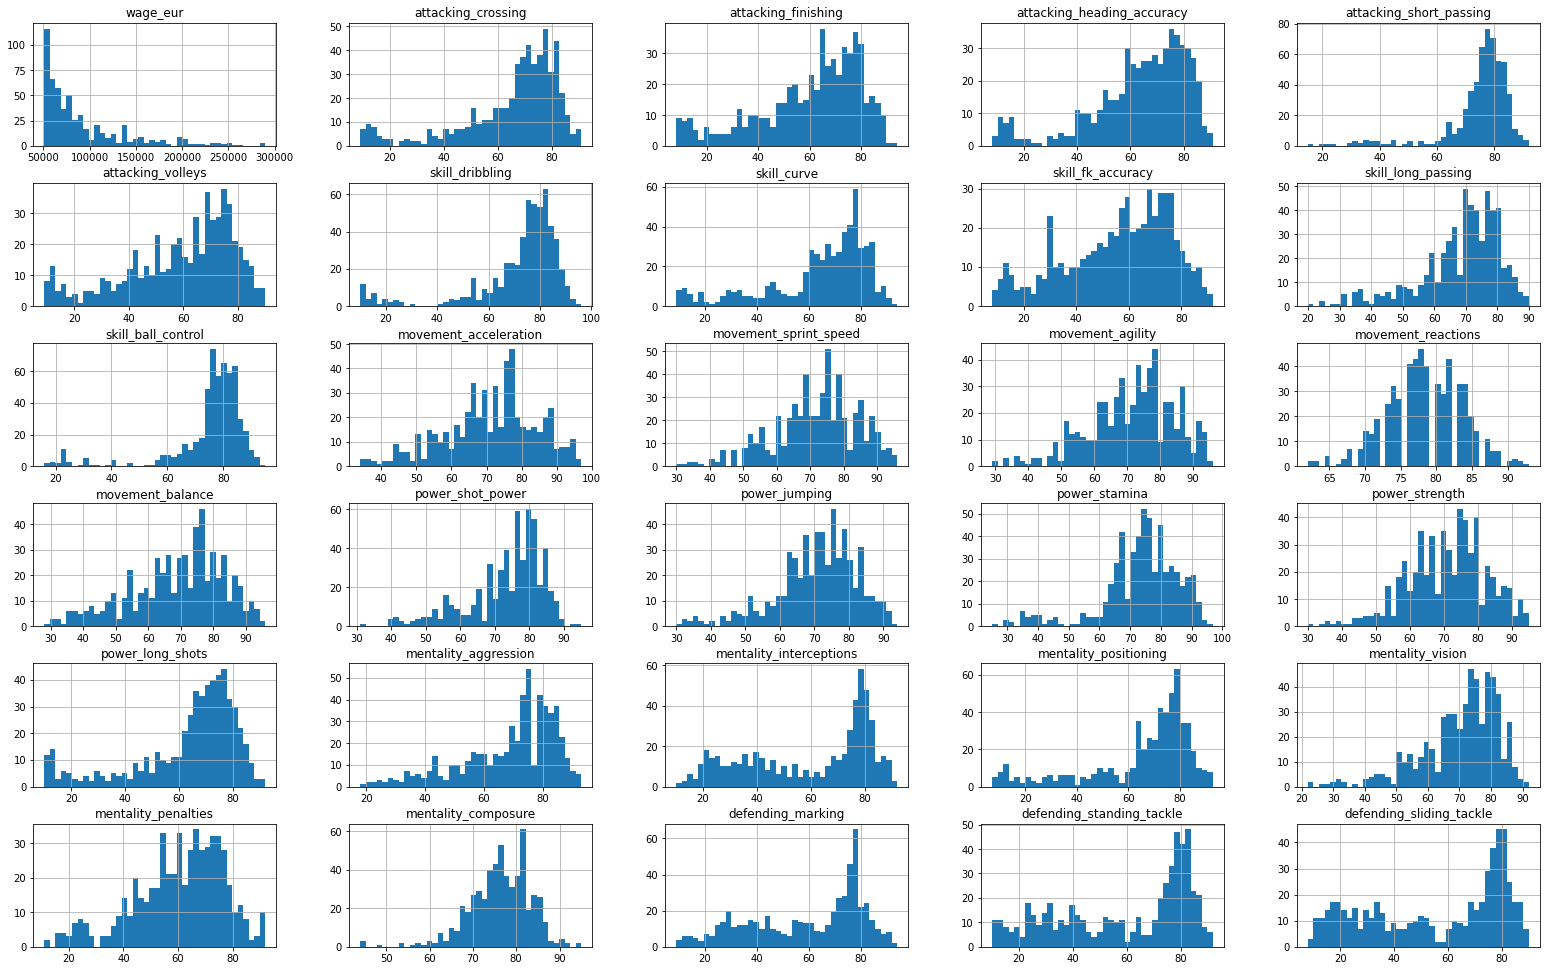

In [351]:
df.hist(bins=40, figsize=(27,17))
plt.show()

In [254]:
df.isna().any()

wage_eur                      False
attacking_crossing            False
attacking_finishing           False
attacking_heading_accuracy    False
attacking_short_passing       False
attacking_volleys             False
skill_dribbling               False
skill_curve                   False
skill_fk_accuracy             False
skill_long_passing            False
skill_ball_control            False
movement_acceleration         False
movement_sprint_speed         False
movement_agility              False
movement_reactions            False
movement_balance              False
power_shot_power              False
power_jumping                 False
power_stamina                 False
power_strength                False
power_long_shots              False
mentality_aggression          False
mentality_interceptions       False
mentality_positioning         False
mentality_vision              False
mentality_penalties           False
mentality_composure           False
defending_marking           

In [255]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print("Length of training data:", len(train_set))
print("Length of testing data:", len(test_set))
print("Length of total data:", len(df))

Length of training data: 3551
Length of testing data: 888
Length of total data: 4439


In [256]:
fifa_df = train_set.copy()
corr_matrix = fifa_df.corr()
corr_matrix['wage_eur'].sort_values(ascending=False)

wage_eur                      1.000000
movement_reactions            0.568853
mentality_composure           0.401042
mentality_vision              0.263914
attacking_short_passing       0.241627
power_shot_power              0.228931
skill_long_passing            0.223434
skill_ball_control            0.203416
skill_curve                   0.169736
attacking_volleys             0.167908
skill_dribbling               0.161451
attacking_crossing            0.151740
mentality_positioning         0.148016
power_long_shots              0.146827
skill_fk_accuracy             0.135373
attacking_finishing           0.133220
mentality_penalties           0.130114
power_stamina                 0.128515
mentality_aggression          0.126552
defending_marking             0.113492
mentality_interceptions       0.110971
movement_agility              0.109264
movement_sprint_speed         0.107835
power_jumping                 0.103367
attacking_heading_accuracy    0.100373
movement_acceleration    

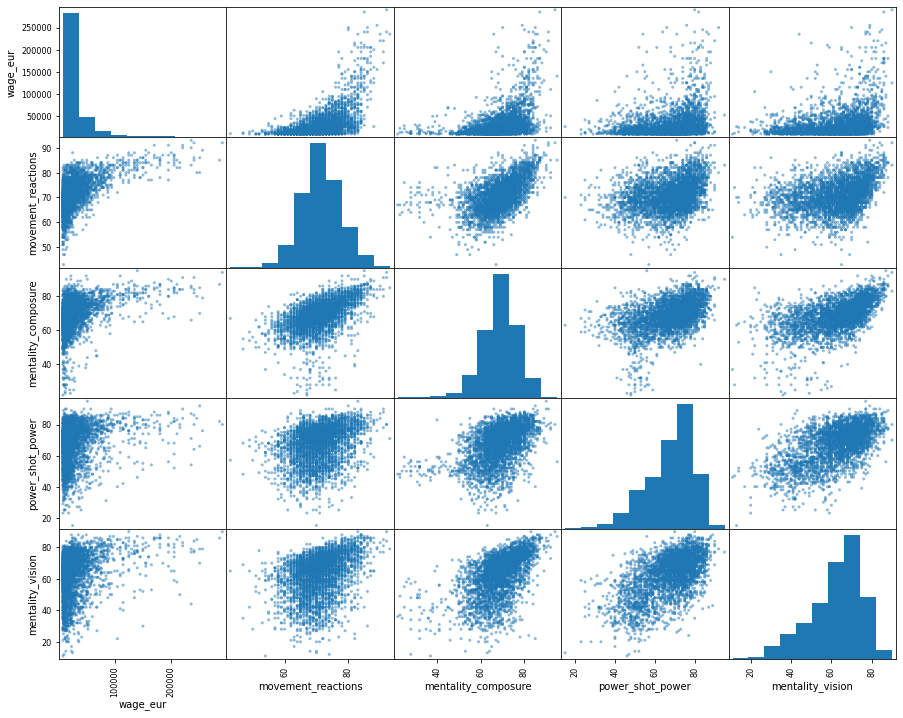

In [257]:
from pandas.plotting import scatter_matrix
attributes = ['wage_eur', 'movement_reactions', 'mentality_composure', 'power_shot_power', 'mentality_vision']
scatter_matrix(fifa_df[attributes], figsize=(15,12))
plt.show()

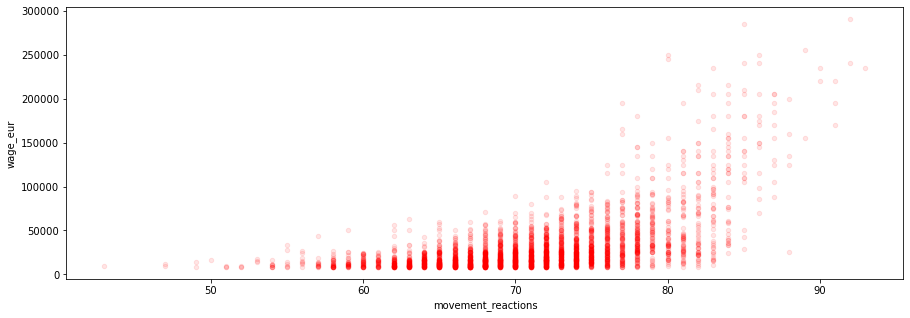

In [258]:
fifa_df.plot(kind='scatter',x='movement_reactions', y='wage_eur', alpha=0.1, color='red')
plt.show()

In [259]:
y_train = train_set['wage_eur']
X_train = train_set.drop('wage_eur', axis=1)
y_test = test_set['wage_eur']
X_test = test_set.drop('wage_eur', axis=1)

In [260]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [261]:
from sklearn.metrics import mean_squared_error
y_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, y_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

24352.214023565994

In [262]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor()

In [263]:
y_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, y_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [264]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(X_train, y_train)

RandomForestRegressor()

In [265]:
y_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, y_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

7322.50851093437

In [266]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lin_reg, X_train, y_train,scoring='neg_mean_squared_error', cv=10)
lin_reg_scores = np.sqrt(-scores)
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard Deviation:", scores.std())
display_scores(lin_reg_scores)

Scores: [26446.98828528 25271.83685591 22211.99886423 23182.37592143
 24370.50187231 23730.8785329  24922.24556778 24259.41818579
 27346.1405742  23657.30468713]
Mean: 24539.96893469695
Standard Deviation: 1449.0252879421407


In [267]:
scores = cross_val_score(tree_reg, X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
tree_scores = np.sqrt(-scores)
display_scores(tree_scores)

Scores: [32685.21123854 26847.14163714 23577.97970057 22964.88439973
 29146.30409252 30141.07673993 23991.78263078 31766.17919809
 27003.02539127 24913.87983536]
Mean: 27303.746486392727
Standard Deviation: 3316.7074153430544


In [268]:
scores1 = cross_val_score(forest_reg, X_train, y_train,
scoring='neg_mean_squared_error', cv=10)
forest_scores = np.sqrt(-scores1)
display_scores(forest_scores)

Scores: [19913.68724992 19620.07551205 17884.29555799 18371.76224996
 20760.00101088 20389.56657387 19407.55887299 19609.24166284
 19881.87852093 16174.24958313]
Mean: 19201.231679456825
Standard Deviation: 1295.4616482151534


In [269]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3,10], 'max_features': [2,3,4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [270]:
grid_search.best_estimator_
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=None, max_features=8, max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_samples_leaf=1,min_samples_split=2, min_weight_fraction_leaf=0.0,n_estimators=30, n_jobs=None, oob_score=False,random_state=None, verbose=0, warm_start=False)

RandomForestRegressor(criterion='mse', max_features=8, n_estimators=30)

In [271]:
grid_search.best_params_
{'max_features': 8, 'n_estimators': 30}

{'max_features': 8, 'n_estimators': 30}

In [272]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

20693.924132363005

In [273]:
confidence = 0.95
squared_errors = (final_predictions - y_test)**2
np.sqrt(stats.t.interval(confidence, len(squared_errors)-1,loc=squared_errors.mean(),
scale=stats.sem(squared_errors)))

array([18201.36480238, 22916.96557842])

In [274]:
df.head()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
2,290000,87,87,62,87,87,96,88,87,81,...,84,51,36,87,90,90,94,27,26,29
3,125000,13,11,15,43,13,12,13,14,40,...,12,34,19,11,65,11,68,27,12,18
6,250000,18,14,11,61,14,21,18,12,63,...,10,43,22,11,70,25,70,25,13,10
7,200000,53,52,86,78,45,70,60,70,81,...,64,82,89,47,65,62,89,91,92,85
9,240000,79,90,59,84,79,89,83,69,75,...,84,63,55,92,84,77,91,38,43,41


In [275]:
df_move=df[["wage_eur","movement_reactions"]]
df_move

,wage_eur,movement_reactions
2,290000,92
3,125000,88
6,250000,86
7,200000,88
9,240000,92
...,...,...
12467,9000,54
12649,10000,52
13199,10000,59
13459,9000,58


In [276]:
#wage=df["wage_eur"]

In [277]:
#dfh=thinkstats2.Hist(wage)
#thinkplot.hist(dfh)


In [278]:
#dfp=thinkstats2.Pmf(wage)
#thinkplot.pmf(dfp)

In [279]:
#dfc=thinkstats2.Cdf(wage)

#thinkplot.cdf(dfc)

In [324]:
df.corr()

,wage_eur,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,...,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle
wage_eur,1.000000,0.133861,0.123224,0.053189,0.213739,0.151280,0.142650,0.153451,0.124969,0.202707,...,0.125147,0.058759,0.065358,0.129725,0.258589,0.130083,0.401811,0.062944,0.043496,0.035364
attacking_crossing,0.133861,1.000000,0.650255,0.295307,0.793851,0.665541,0.853355,0.862455,0.741037,0.691569,...,0.751196,0.310352,0.263348,0.781035,0.688600,0.609608,0.495318,0.284689,0.289505,0.258784
attacking_finishing,0.123224,0.650255,1.000000,0.332728,0.626593,0.899337,0.806343,0.761014,0.697251,0.393235,...,0.863442,0.125629,-0.197080,0.913105,0.681249,0.827512,0.486026,-0.145386,-0.170242,-0.225920
attacking_heading_accuracy,0.053189,0.295307,0.332728,1.000000,0.530935,0.341980,0.416218,0.257651,0.187553,0.372838,...,0.324686,0.676739,0.451793,0.372118,0.028913,0.369645,0.391752,0.504365,0.485762,0.455260
attacking_short_passing,0.213739,0.793851,0.626593,0.530935,1.000000,0.647499,0.856151,0.762903,0.689435,0.858532,...,0.740487,0.528567,0.465497,0.726559,0.663794,0.613553,0.673345,0.498275,0.491235,0.439921
attacking_volleys,0.151280,0.665541,0.899337,0.341980,0.647499,1.000000,0.789518,0.781948,0.723882,0.437953,...,0.861079,0.168469,-0.124281,0.864124,0.672850,0.819044,0.524694,-0.074509,-0.103069,-0.155519
skill_dribbling,0.142650,0.853355,0.806343,0.416218,0.856151,0.789518,1.000000,0.854218,0.729094,0.660721,...,0.838389,0.338939,0.163936,0.886079,0.711770,0.720364,0.578881,0.212684,0.200914,0.151757
skill_curve,0.153451,0.862455,0.761014,0.257651,0.762903,0.781948,0.854218,1.000000,0.845470,0.638135,...,0.840394,0.222934,0.101379,0.832565,0.748136,0.729853,0.541410,0.134085,0.122527,0.079525
skill_fk_accuracy,0.124969,0.741037,0.697251,0.187553,0.689435,0.723882,0.729094,0.845470,1.000000,0.628292,...,0.809749,0.189989,0.087557,0.717165,0.702481,0.726682,0.487761,0.107409,0.104980,0.058661
skill_long_passing,0.202707,0.691569,0.393235,0.372838,0.858532,0.437953,0.660721,0.638135,0.628292,1.000000,...,0.597693,0.497015,0.595023,0.490702,0.615142,0.426511,0.599439,0.587606,0.601659,0.562641


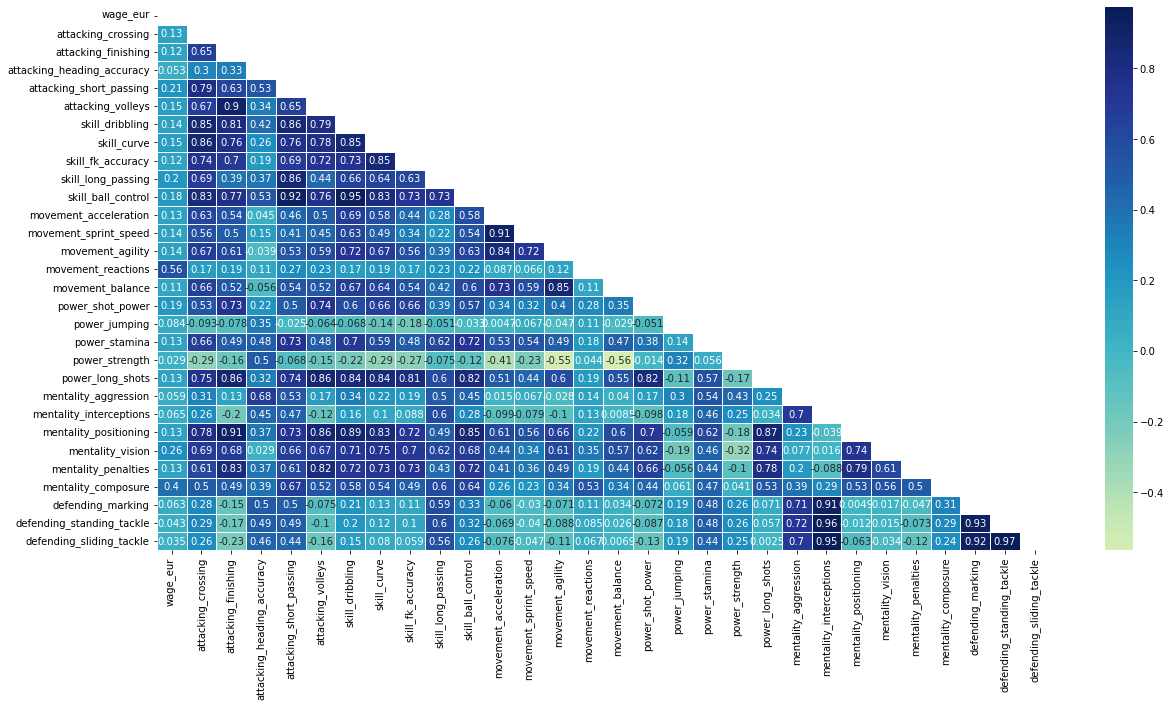

In [325]:
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

In [329]:
# 'mentality_composure', 'power_shot_power', 'mentality_vision'
new_df = df[['wage_eur', 'movement_reactions', 'mentality_composure', 'mentality_vision']]


In [330]:
new_df.corr()

,wage_eur,movement_reactions,mentality_composure,mentality_vision
wage_eur,1.000000,0.558486,0.401811,0.258589
movement_reactions,0.558486,1.000000,0.527744,0.351100
mentality_composure,0.401811,0.527744,1.000000,0.559784
mentality_vision,0.258589,0.351100,0.559784,1.000000


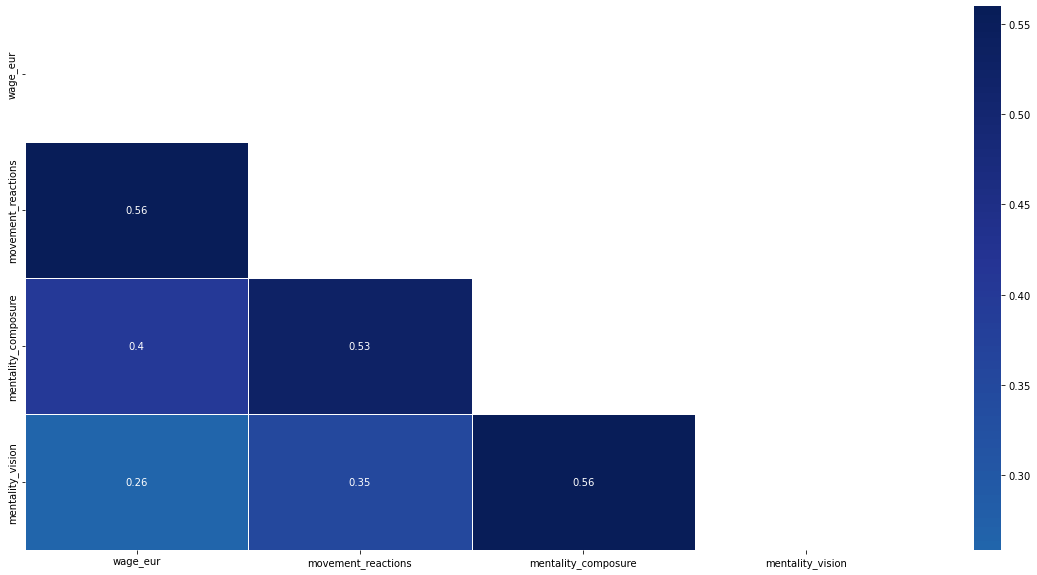

In [334]:
plt.rcParams["figure.figsize"] = (20,10)
mask = np.triu(np.ones_like(new_df.corr(), dtype=bool))
sns.heatmap(new_df.corr(), center=0, linewidths=.5, annot=True, cmap="YlGnBu", yticklabels=True, mask=mask)
plt.show()

In [335]:
new_df.describe()

,wage_eur,movement_reactions,mentality_composure,mentality_vision
count,2103.000000,2103.000000,2103.000000,2103.000000
mean,47610.080837,74.149786,71.907275,65.456966
std,37765.402503,5.706583,8.028580,13.150810
min,21000.000000,55.000000,23.000000,13.000000
25%,26000.000000,70.000000,68.000000,59.000000
50%,34000.000000,74.000000,73.000000,68.000000
75%,52000.000000,78.000000,77.000000,75.000000
max,290000.000000,93.000000,95.000000,92.000000


In [332]:
new_df.shape

(2103, 4)

In [283]:
#df_wage=df["wage_eur"]

In [284]:
#nwage_obj=thinkstats2.Cdf(df_wage)
#thinkplot.Cdf(nwage_obj)

In [285]:
#thinkstats2.NormalProbabilityPlot(df["wage_eur"])

In [286]:
#df.describe()

In [352]:

w = "wage_eur"
c = "movement_reactions"
hw = new_df[['wage_eur', "movement_reactions"]]
hw = hw.dropna(axis=0)
hw = hw.dropna(axis=1)

In [288]:
#https://towardsdatascience.com/fifa-ultimate-team-rating-prediction-machine-learning-project-3a02767fcb38

<AxesSubplot:xlabel='wage_eur', ylabel='movement_reactions'>

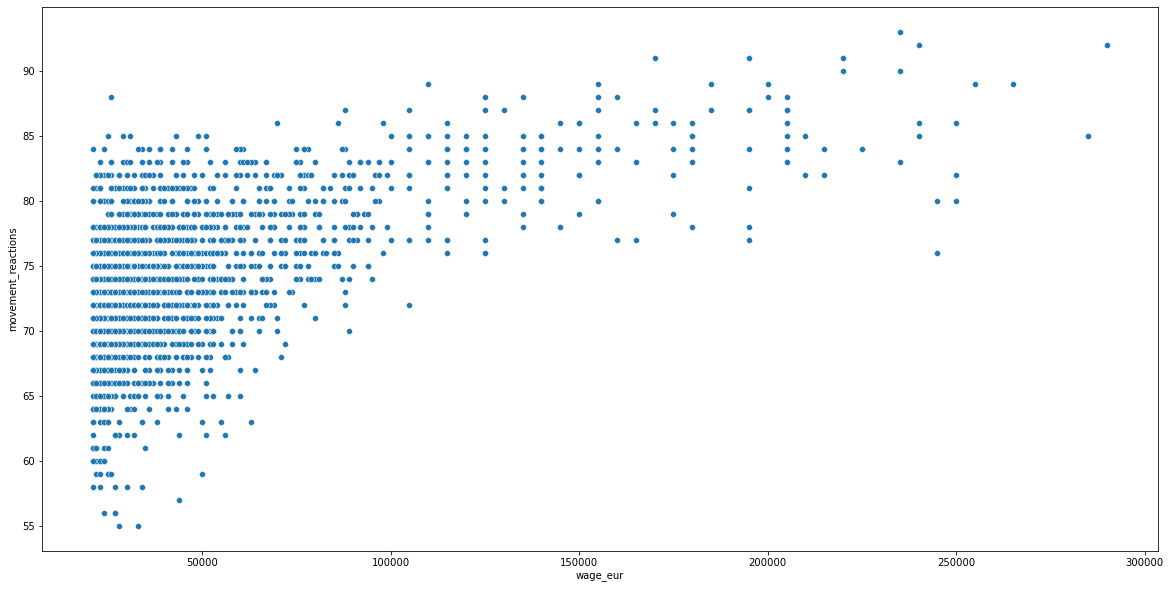

In [353]:
sns.scatterplot(data=hw, x=hw[w], y=hw[c])

In [354]:
#Do regression
inter, slope = thinkstats2.LeastSquares(hw[w], hw[c]) # Calculate model
res = thinkstats2.Residuals(hw[w], hw[c], inter, slope) # Make residual list. Used later, not needed now. 
regLine = thinkstats2.FitLine(hw[w], inter, slope) # Generate line for plotting. 
print("Y intercept:", inter)
print("Slope:", slope)


Y intercept: 70.13194228474944
Slope: 8.439060939606815e-05


In [355]:
#Deal with data
#ensure that the inputs and outputs are the right shape.
#The -1 means basically "make it one column" in this use. 
x = np.array(hw[w]).reshape(-1,1)
y = np.array(hw[c]).reshape(-1,1)
x.shape, y.shape

((2103, 1), (2103, 1))

In [342]:
#generate Model
model = LinearRegression().fit(x, y) 

In [344]:
#Get the results of generating the model

#Note: some results come wrapped in an array, that's what the [0]s are for. Remove them to see the true return. 
# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
r_sq = model.score(x, y)

print('Coefficient of determination (more on this later):', r_sq)
#Print the Intercept:
print('Intercept:', model.intercept_[0])
# Print the Slope:
print('Slope:', model.coef_[0][0]) 

Coefficient of determination (more on this later): 0.31190634533449346
Intercept: 70.13194228474944
Slope: 8.439060939606819e-05


In [294]:
#df_move=df[["wage_eur","movement_reactions"]]
#df_move

In [356]:
#Generate predictions. 
#Note - you need to provide the values to predict in an array that is one column wide. 
#Generally you'd make an array of all the things you want to predict and do them en-masse. 
print("for movement_reactions 92 the  expected wage is:", model.predict(np.array(92).reshape(-1,1))[0][0], "euros")


for movement_reactions 92 the  expected wage is: 70.13970622081388 euros


<AxesSubplot:xlabel='X', ylabel='Y'>

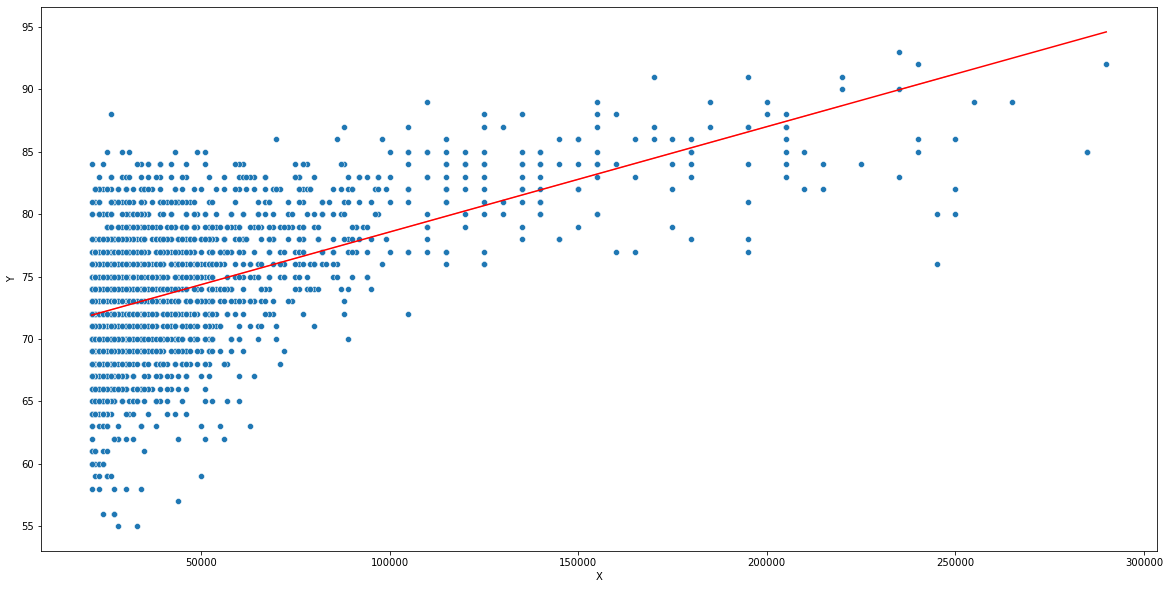

In [357]:
#I'll make a df for ease of use. 
dat = pd.DataFrame(data=np.column_stack((x,y)),columns=['X','Y'])
sns.scatterplot(data=dat, x="X", y="Y")

#Generate the line
inter = model.intercept_[0]
slo = model.coef_[0][0]
inter, slo
lineInf = thinkstats2.FitLine(dat["X"], inter, slo)
sns.lineplot(x=lineInf[0], y=lineInf[1], color="red")

<AxesSubplot:xlabel='X', ylabel='Y'>

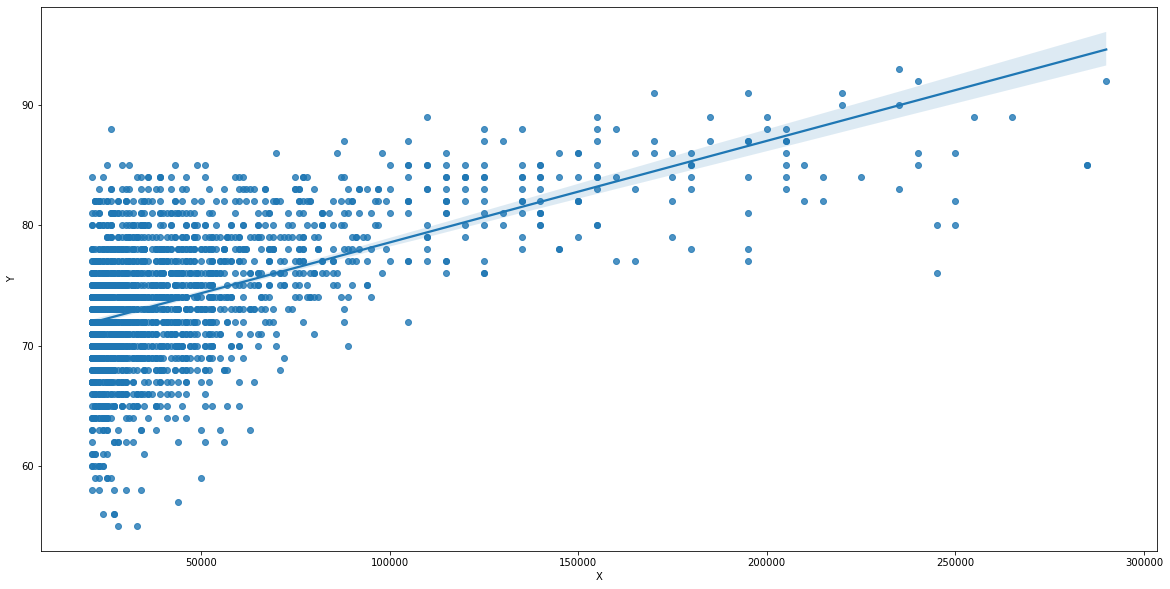

In [358]:
sns.regplot(data=dat, x="X", y="Y")

<AxesSubplot:xlabel='wage_eur', ylabel='movement_reactions'>

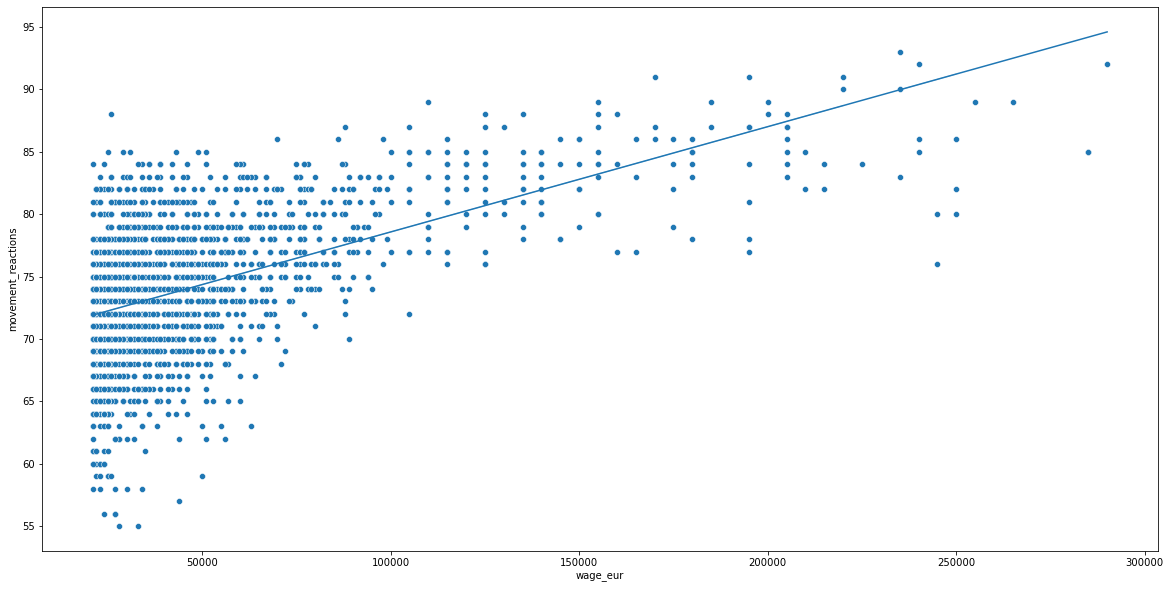

In [359]:
#Graph it.
#The fitline above calculates the line for us. For an exercise, try to implement a copy of that...
sns.scatterplot(x=hw[w], y=hw[c])
sns.lineplot(x=regLine[0], y=regLine[1])

In [360]:
#print("A skill_curve 93 than the person is expected to be have wages:", slope*93 + inter, "euros")
print(slope*93)

0.007848326673834338


In [300]:
#Plot residuals directly
#sns.scatterplot(x=hw[w], y=res)
#plt.axhline(0, color="red")

In [301]:
#Seaborn also has a built in residual plot. 
#sns.residplot(x=hw[w], y=hw[c])

In [302]:
# Import library for VIF
#from statsmodels.stats.outliers_influence import variance_inflation_factor

#Function will check the VIF of each variable in a DF and return the results in another DF
#def calc_vif(X):
    # Calculating VIF
 #   vif = pd.DataFrame()
  #  vif["variables"] = X.columns
   # vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
   # return(vif)

In [303]:
#df.head(1)

In [304]:
#df_ = df.drop(columns={"wage_eur"})
#df_.head()

In [305]:
#Check VIFs
#calc_vif(df_)

In [307]:
#new_df.corr()

In [308]:
#calc_vif(new_df)